Импортируем нужные пакеты и библиотеки

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

import pmdarima as pm
from pmdarima import model_selection
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

Считываем набор данных

In [7]:
df = pd.read_csv('home.csv')
df

,id,cleani,cleanv,clouds_all,main_feels_like,main_grnd_level,main_humidity,main_pressure,main_sea_level,main_temp,...,main_temp_min,normala,normalv,rain_1h,time,timestamp,visibility,wind_deg,wind_gust,wind_speed
0,5,0,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,0.00,0.00,0,00:39:17,1675643957,1407,332,7.16,2.59
1,13,2,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,2.50,0.00,0,00:49:54,1675644594,1407,332,7.16,2.59
2,20,4,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,5.00,0.00,0,00:51:38,1675644698,1407,332,7.16,2.59
3,26,6,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,7.50,0.00,0,00:53:06,1675644786,1407,332,7.16,2.59
4,32,7,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,8.75,0.00,0,00:54:36,1675644876,1407,332,7.16,2.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26339,26340,27,1345,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,33.75,1784.73,0,13:57:31,1676037451,10000,215,15.57,6.55
26340,26341,26,1344,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,32.50,1783.40,0,13:57:59,1676037479,10000,215,15.57,6.55
26341,26342,28,1343,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,35.00,1782.08,0,13:58:14,1676037494,10000,215,15.57,6.55
26342,26343,26,1343,99,-6.94,997,82,1018,1018,-0.96,...,-1.15,32.50,1782.08,0,13:57:43,1676037463,10000,215,15.57,6.55


Изучим столбцы датафрейма

In [8]:
print(len(df.columns.tolist()))
df.columns.tolist()

21


['id',
 'cleani',
 'cleanv',
 'clouds_all',
 'main_feels_like',
 'main_grnd_level',
 'main_humidity',
 'main_pressure',
 'main_sea_level',
 'main_temp',
 'main_temp_max',
 'main_temp_min',
 'normala',
 'normalv',
 'rain_1h',
 'time',
 'timestamp',
 'visibility',
 'wind_deg',
 'wind_gust',
 'wind_speed']

In [9]:
feature_keys = [
 'cleani',
 'cleanv',
 'clouds_all',
 'main_feels_like',
 'main_grnd_level',
 'main_humidity',
 'main_pressure',
 'main_sea_level',
 'main_temp',
 'main_temp_max',
 'main_temp_min',
 'normala',
 'normalv',
 'rain_1h',
 'visibility',
 'wind_deg',
 'wind_gust',
 'wind_speed'
]

titles = [
    "Сила тока",
    "Напряжение",
    "Облачность",
    "Main_feels_like",
    "Уровень грунта",
    "Влажность",
    "Давление",
    "Уровень моря",
    "Температура воздуха",
    "Макс. температура воздуха",
    "Мин. температура воздуха",
    "Норм. сила тока",
    "Норм. напряжение",
    "Дождь в час",
    "Видимость",
    "Уровень ветра",
    "Порывы ветра",
    "Скорость ветра",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "yellow",
]

Преобразуем в формат Дата/время столбец 'timestamp'

In [10]:
df['date'] = pd.to_datetime(df['timestamp'], unit='s')

Проверим типы данных столбцов датафрейма и пропущенные значения

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26344 entries, 0 to 26343
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               26344 non-null  int64         
 1   cleani           26344 non-null  int64         
 2   cleanv           26344 non-null  int64         
 3   clouds_all       26344 non-null  int64         
 4   main_feels_like  26344 non-null  float64       
 5   main_grnd_level  26344 non-null  int64         
 6   main_humidity    26344 non-null  int64         
 7   main_pressure    26344 non-null  int64         
 8   main_sea_level   26344 non-null  int64         
 9   main_temp        26344 non-null  float64       
 10  main_temp_max    26344 non-null  float64       
 11  main_temp_min    26344 non-null  float64       
 12  normala          26344 non-null  float64       
 13  normalv          26344 non-null  float64       
 14  rain_1h          26344 non-null  int64

Построим коробчатую диаграмму для просмотра распределения даты/времени

<Axes: >

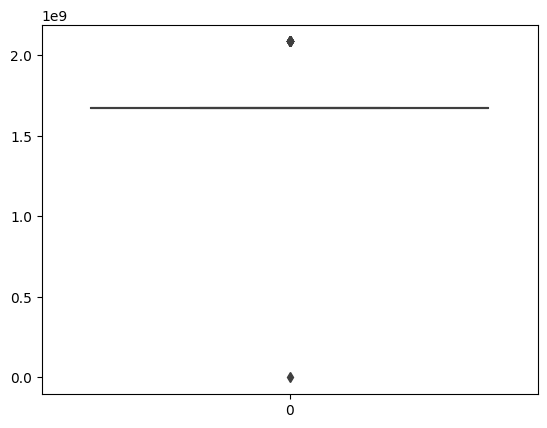

In [12]:
sns.boxplot(df.timestamp)

Из вышеуказанной диаграммы можно сделать вывод: есть выбросы в столбце с датой/временем, которые необходимо удалить или устранить каким-либо образом

Для устранения выбросов оставляем отфильтрованные строки, где год равен 2023-му

In [13]:
sub_df = df[df.date.dt.year == 2023]
sub_df.set_index("date", inplace = True)

Еще раз проверим через коробчатую диаграмму выбросы

<Axes: >

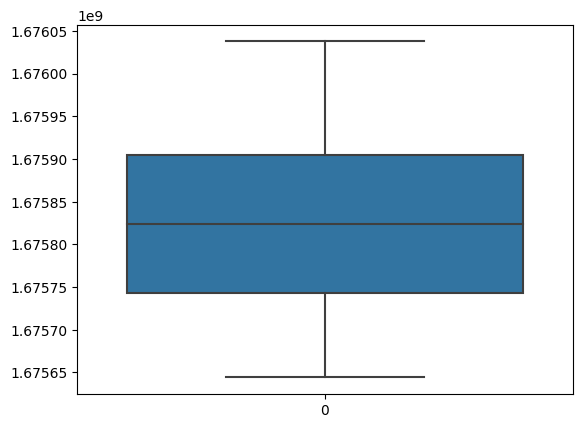

In [14]:
sns.boxplot(sub_df.timestamp)

Построим график распределения данных по напряжению (столбец normalv)

<Axes: xlabel='date'>

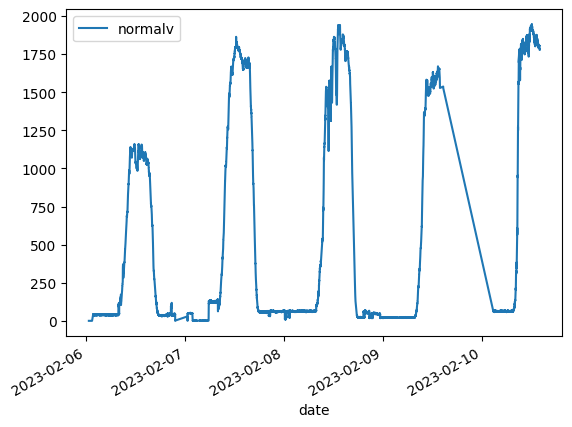

In [15]:
sub_df.plot(y='normalv', style='-')

In [16]:
sub_df.head()

,id,cleani,cleanv,clouds_all,main_feels_like,main_grnd_level,main_humidity,main_pressure,main_sea_level,main_temp,...,main_temp_min,normala,normalv,rain_1h,time,timestamp,visibility,wind_deg,wind_gust,wind_speed
date,,,,,,,,,,,,,,,,,,,,,
2023-02-06 00:39:17,5,0,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,0.00,0.0,0,00:39:17,1675643957,1407,332,7.16,2.59
2023-02-06 00:49:54,13,2,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,2.50,0.0,0,00:49:54,1675644594,1407,332,7.16,2.59
2023-02-06 00:51:38,20,4,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,5.00,0.0,0,00:51:38,1675644698,1407,332,7.16,2.59
2023-02-06 00:53:06,26,6,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,7.50,0.0,0,00:53:06,1675644786,1407,332,7.16,2.59
2023-02-06 00:54:36,32,7,0,97,-7.18,1009,97,1031,1031,-3.42,...,-3.88,8.75,0.0,0,00:54:36,1675644876,1407,332,7.16,2.59


Визуализируем временные ряды по каждому столбцу

<ipython-input-17-8e23812007b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(['id', 'time', 'main_grnd_level', 'cleani', 'normala', 'timestamp'], axis=1, inplace=True)


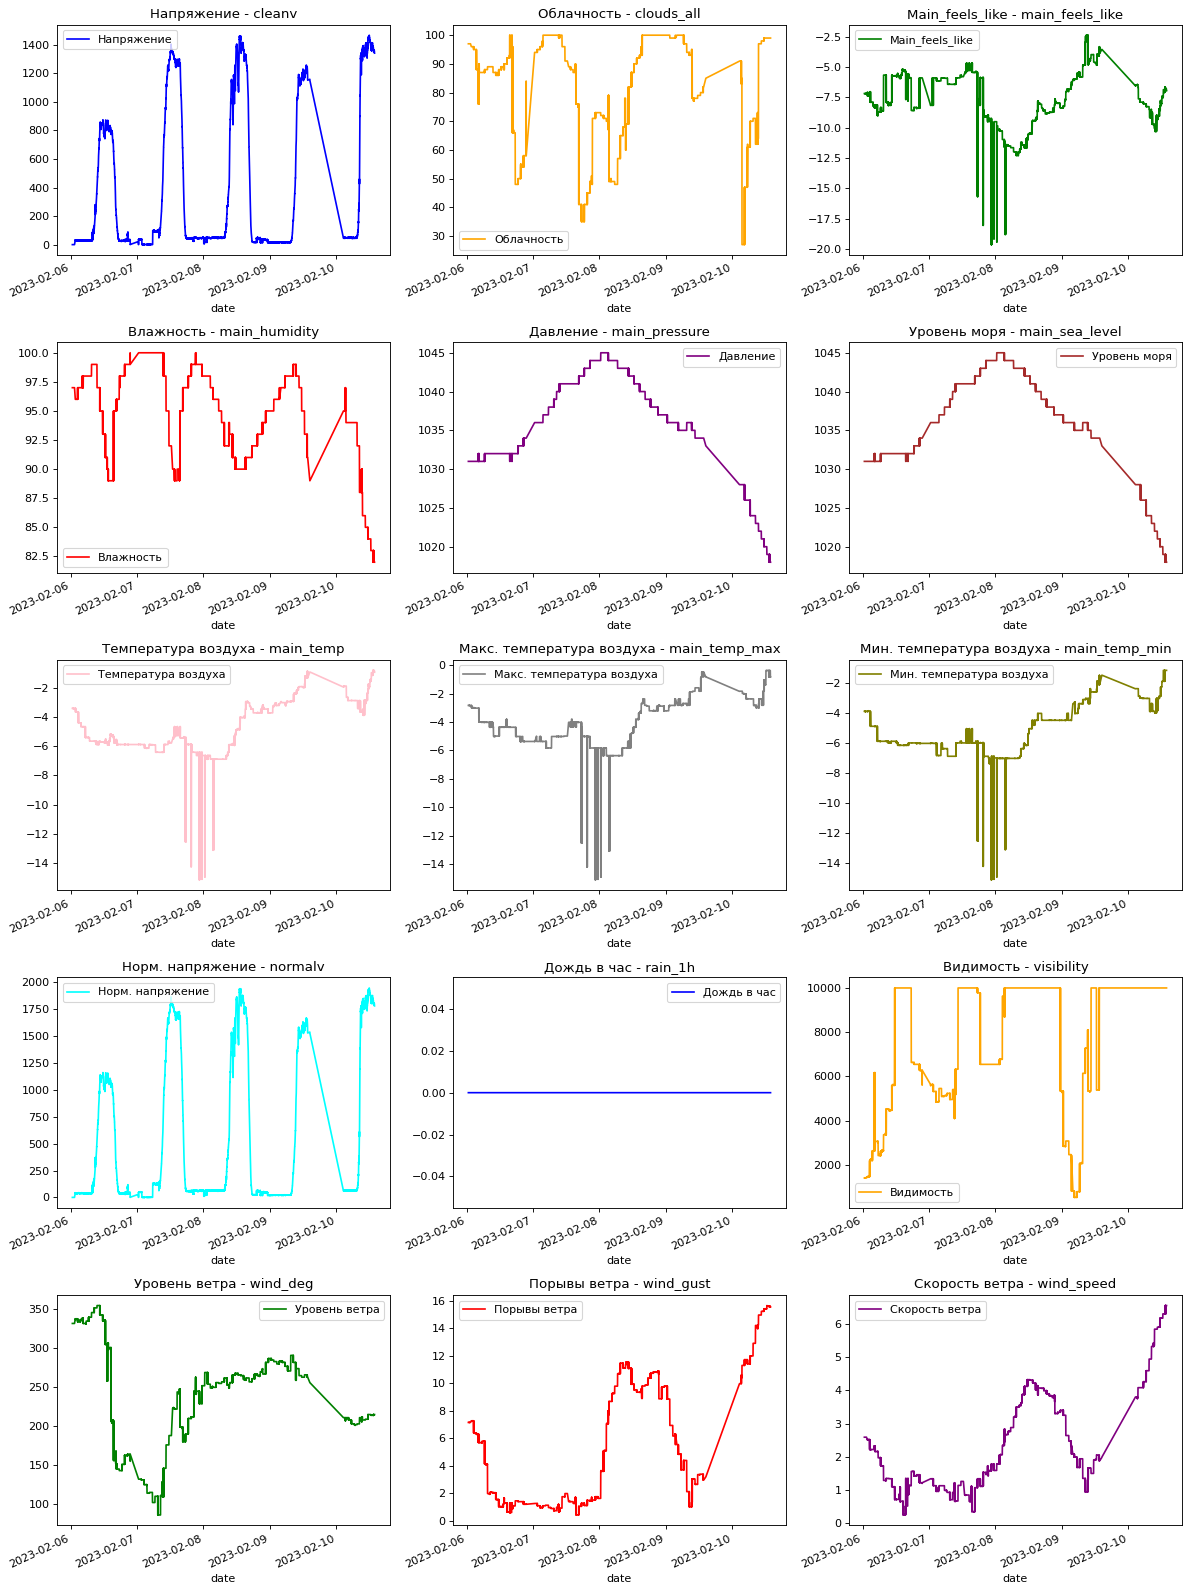

In [17]:
sub_df.drop(['id', 'time', 'main_grnd_level', 'cleani', 'normala', 'timestamp'], axis=1, inplace=True)

feature_keys = [
#  'cleani',
 'cleanv',
 'clouds_all',
 'main_feels_like',
#  'main_grnd_level',
 'main_humidity',
 'main_pressure',
 'main_sea_level',
 'main_temp',
 'main_temp_max',
 'main_temp_min',
#  'normala',
 'normalv',
 'rain_1h',
 'visibility',
 'wind_deg',
 'wind_gust',
 'wind_speed'
]

titles = [
#     "Сила тока",
    "Напряжение",
    "Облачность",
    "Main_feels_like",
#     "Уровень грунта",
    "Влажность",
    "Давление",
    "Уровень моря",
    "Температура воздуха",
    "Макс. температура воздуха",
    "Мин. температура воздуха",
#     "Норм. сила тока",
    "Норм. напряжение",
    "Дождь в час",
    "Видимость",
    "Уровень ветра",
    "Порывы ветра",
    "Скорость ветра",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
#     "pink",
#     "gray",
#     "yellow",
]


def show_raw_visualization(data):
    time_data = data.index
    fig, axes = plt.subplots(
        nrows=5, ncols=3, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 3, i % 3],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()

show_raw_visualization(sub_df)

Проверим временные ряды на стационарность с помощью теста Дики-Фуллера

In [4]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    result = adfuller(series.values)
    print(f'    Применение расширенного критерия Дики-Фуллера на "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mРяд стационарный\u001b[0m")
    else:
        print("\x1b[31mРяд нестационарный\x1b[0m")

С помощью минимаксного масштабирования нормализуем данные столбцов, приведя их к единому измерению

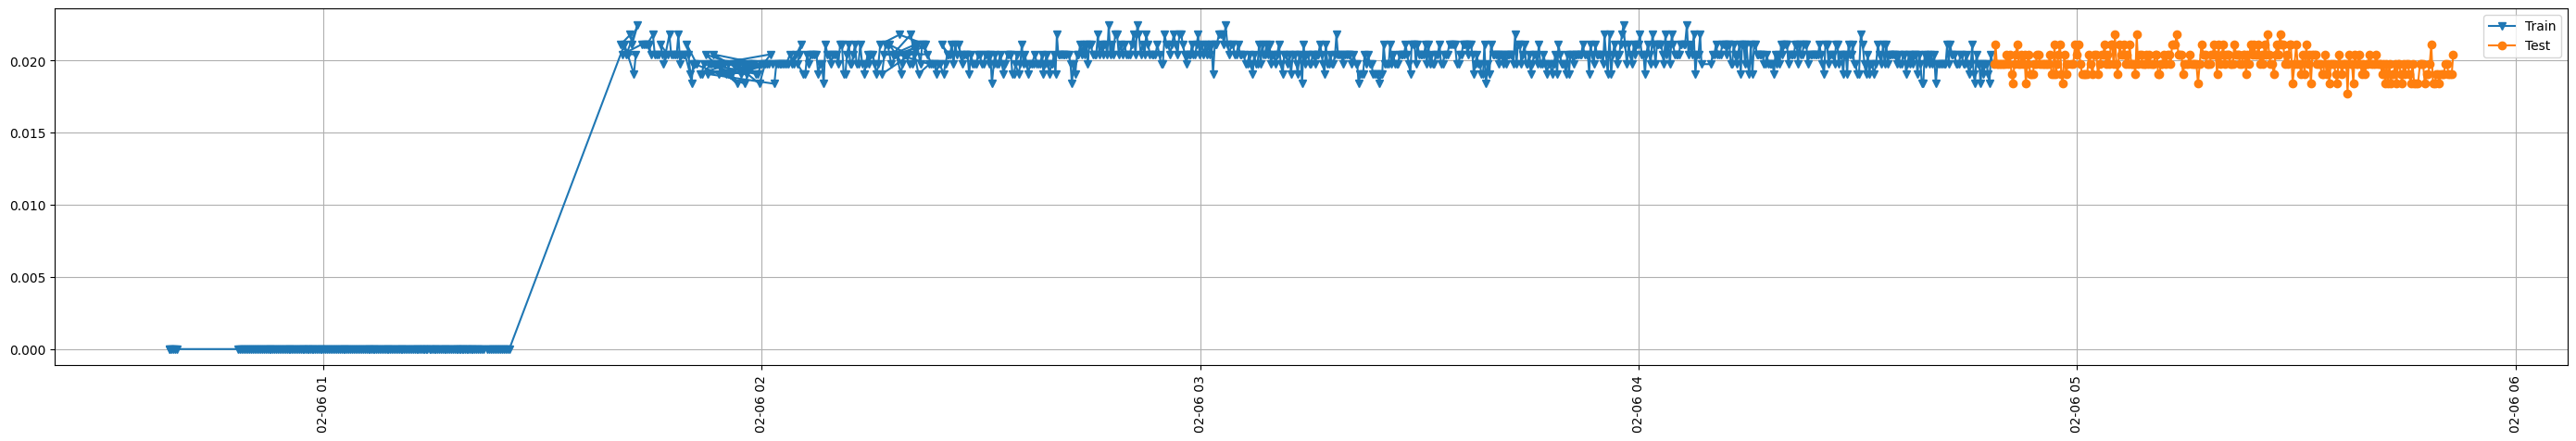

In [18]:
from sklearn.preprocessing import MinMaxScaler
# нормализация данных
scaler = MinMaxScaler()
sub_df = pd.DataFrame(scaler.fit_transform(sub_df.values), columns=sub_df.columns, index=sub_df.index)

train = sub_df[:1000]
test = sub_df[1000:1300]

plt.figure(figsize=(35,5))
plt.grid()
plt.plot(train['normalv'], marker='v', label='Train')
plt.plot( test['normalv'], marker='o', label='Test')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
train

,cleanv,clouds_all,main_feels_like,main_humidity,main_pressure,main_sea_level,main_temp,main_temp_max,main_temp_min,normalv,rain_1h,visibility,wind_deg,wind_gust,wind_speed
date,,,,,,,,,,,,,,,
2023-02-06 00:39:17,0.000000,0.958904,0.721321,0.833333,0.481481,0.481481,0.818754,0.832656,0.804581,0.000000,0.0,0.092704,0.914498,0.441967,0.371429
2023-02-06 00:49:54,0.000000,0.958904,0.721321,0.833333,0.481481,0.481481,0.818754,0.832656,0.804581,0.000000,0.0,0.092704,0.914498,0.441967,0.371429
2023-02-06 00:51:38,0.000000,0.958904,0.721321,0.833333,0.481481,0.481481,0.818754,0.832656,0.804581,0.000000,0.0,0.092704,0.914498,0.441967,0.371429
2023-02-06 00:53:06,0.000000,0.958904,0.721321,0.833333,0.481481,0.481481,0.818754,0.832656,0.804581,0.000000,0.0,0.092704,0.914498,0.441967,0.371429
2023-02-06 00:54:36,0.000000,0.958904,0.721321,0.833333,0.481481,0.481481,0.818754,0.832656,0.804581,0.000000,0.0,0.092704,0.914498,0.441967,0.371429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06 04:47:36,0.019755,0.821918,0.666860,0.888889,0.481481,0.481481,0.731281,0.754065,0.732999,0.019754,0.0,0.267342,0.914498,0.345574,0.303175
2023-02-06 04:47:49,0.019074,0.821918,0.666860,0.888889,0.481481,0.481481,0.731281,0.754065,0.732999,0.019071,0.0,0.267342,0.914498,0.345574,0.303175
2023-02-06 04:48:00,0.018392,0.821918,0.666860,0.888889,0.481481,0.481481,0.731281,0.754065,0.732999,0.018394,0.0,0.267342,0.914498,0.345574,0.303175


Построим и визуализируем матрицу корреляции

<Axes: >

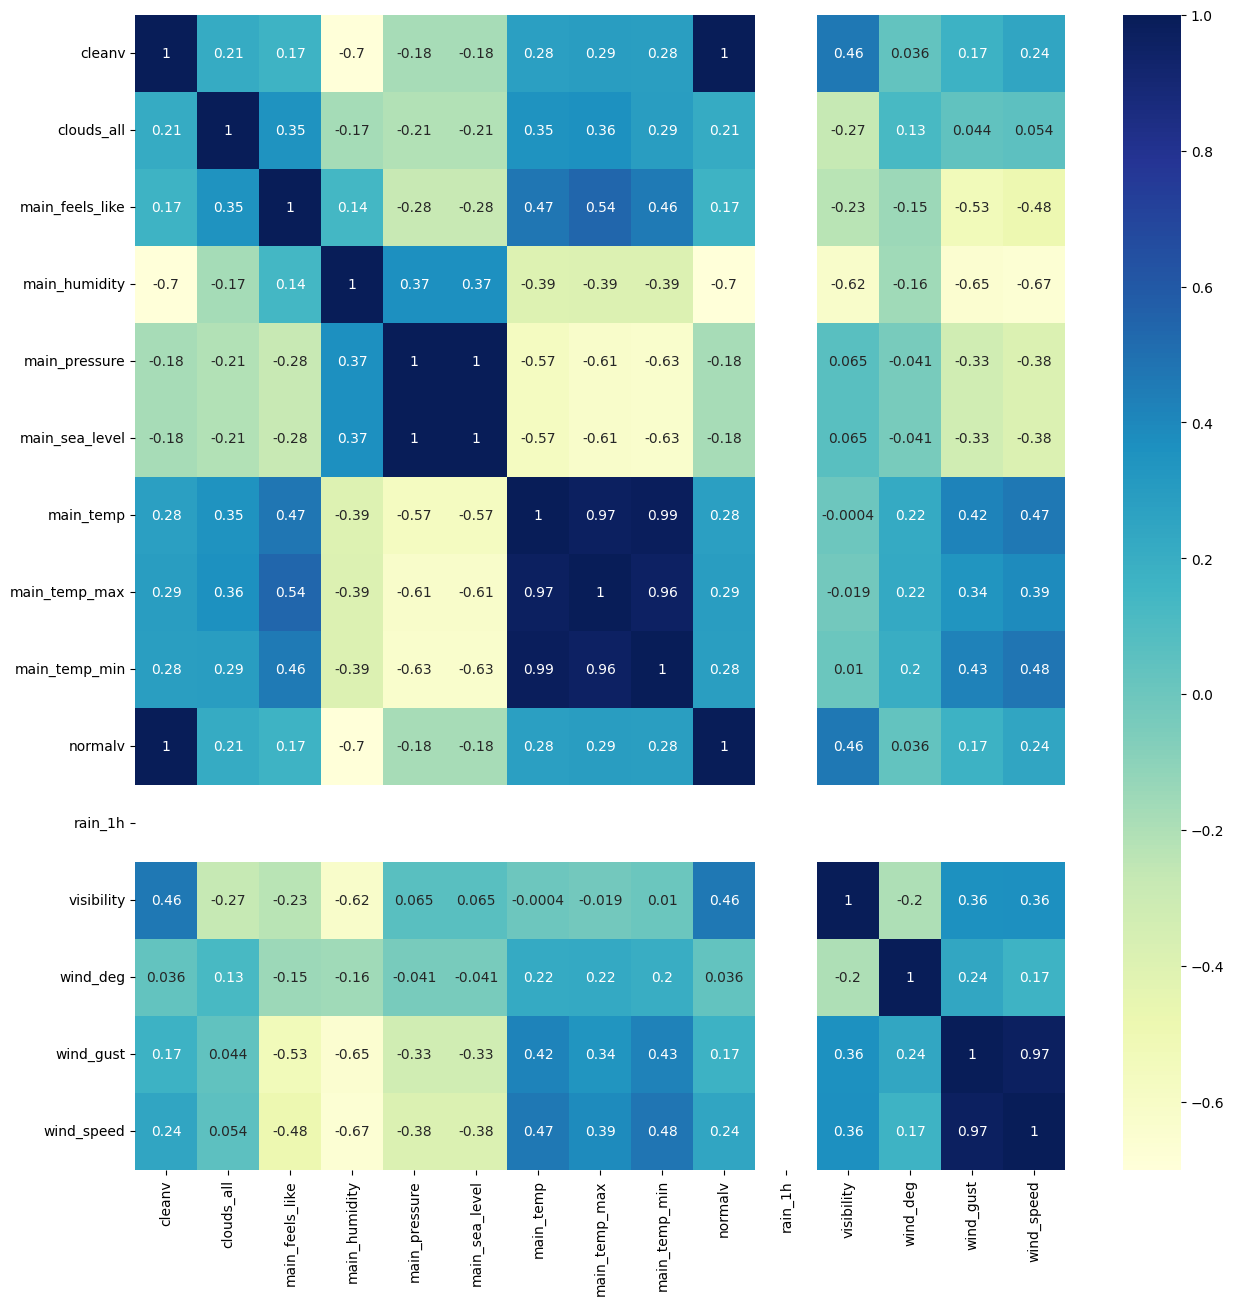

In [19]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(sub_df.corr(), cmap="YlGnBu", annot=True, ax=ax)

In [ ]:
train = train.reset_index()

# Построим и обучим модель AutoARIMA

Вычислим метрики точности модели (MAPE, MSE)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=-20229.148, Time=21.81 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=-22708.339, Time=2.65 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=-20185.913, Time=10.54 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=-22952.356, Time=9.09 sec
 ARIMA(0,2,1)(0,0,0)[4]             : AIC=-22954.199, Time=4.10 sec
 ARIMA(0,2,1)(1,0,0)[4]             : AIC=-22952.410, Time=7.04 sec
 ARIMA(0,2,1)(1,0,1)[4]             : AIC=-22950.358, Time=7.14 sec
 ARIMA(1,2,1)(0,0,0)[4]             : AIC=-20656.736, Time=11.75 sec
 ARIMA(0,2,2)(0,0,0)[4]             : AIC=-22952.199, Time=5.99 sec
 ARIMA(1,2,0)(0,0,0)[4]             : AIC=-19771.939, Time=7.33 sec
 ARIMA(1,2,2)(0,0,0)[4]             : AIC=-23152.724, Time=5.68 sec
 ARIMA(1,2,2)(1,0,0)[4]             : AIC=-23148.999, Time=7.22 sec
 ARIMA(1,2,2)(0,0,1)[4]             : AIC=-23151.161, Time=8.84 sec
 ARIMA(1,2,2)(1,0,1)[4]             : AIC=-23149.171, Time=8.59 sec
 A

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


KeyError: ignored

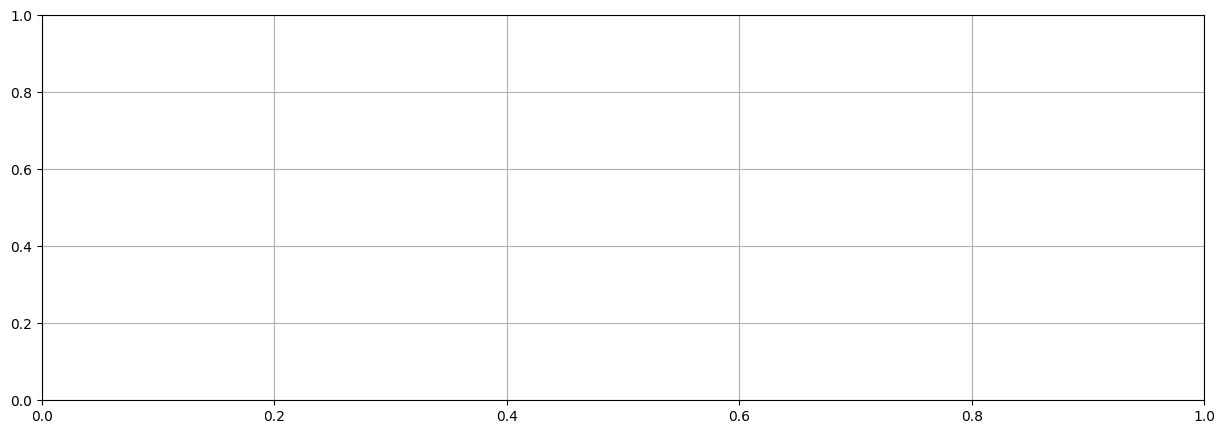

In [21]:
arima = pm.auto_arima(train['normalv'],X=train.drop(columns=['date','normalv']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

print(arima.summary())
print(arima.params)


pred=arima.predict(n_periods=300, X=test.drop(columns=['normalv']), alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(train['date'][7000:20000],test['normalv'], marker='o', label='Test')
plt.plot(train['date'][7000:20000],pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(test['normalv'], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['normalv'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)


a=pd.DataFrame(test['normalv'])
a=a.reset_index()
a

prediction=pd.DataFrame(pred)
prediction=prediction.reset_index()
prediction
output=pd.DataFrame()
output['Test']=a['normalv']
output['Prediction']=prediction[0]
output['Difference']=output['Test']-output['Prediction']
output['% Chnage']=abs(output['Difference']/output['Test'])*100
output

Сохраняем модель в pickle-формате

In [ ]:
import pickle

with open('model_pickle','wb') as f:
    pickle.dump(arima,f)

Пробуем предсказать с помощью сохраненной загруженной модели

In [ ]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

pred=mp.predict(n_periods=300, X=test.drop(columns=['normalv']), alpha=0.05)
pred

1000    0.019753
1001    0.021115
1002    0.019750
1003    0.019749
1004    0.019747
          ...   
1295    0.019335
1296    0.018652
1297    0.018651
1298    0.018649
1299    0.020012
Length: 300, dtype: float64

# Нейросетевая модель на основе LSTM-сети

In [ ]:
split_fraction = 0.715
train_split = int(split_fraction * int(sub_df.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_min = data[:train_split].min(axis=0)
    data_max = data[:train_split].max(axis=0)
    return (data - data_min) / (data_max-data_min)

In [ ]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26327 entries, 2023-02-06 00:39:17 to 2023-02-10 13:58:30
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cleanv           26327 non-null  float64
 1   clouds_all       26327 non-null  float64
 2   main_feels_like  26327 non-null  float64
 3   main_humidity    26327 non-null  float64
 4   main_pressure    26327 non-null  float64
 5   main_sea_level   26327 non-null  float64
 6   main_temp        26327 non-null  float64
 7   main_temp_max    26327 non-null  float64
 8   main_temp_min    26327 non-null  float64
 9   normalv          26327 non-null  float64
 10  rain_1h          26327 non-null  float64
 11  visibility       26327 non-null  float64
 12  wind_deg         26327 non-null  float64
 13  wind_gust        26327 non-null  float64
 14  wind_speed       26327 non-null  float64
dtypes: float64(15)
memory usage: 3.2 MB


In [ ]:
sub_df

,cleanv,clouds_all,main_feels_like,main_humidity,main_pressure,main_sea_level,main_temp,main_temp_max,main_temp_min,normalv,rain_1h,visibility,wind_deg,wind_gust,wind_speed
date,,,,,,,,,,,,,,,
2023-02-06 00:39:17,0.000000,0.958904,0.721321,0.833333,0.481481,0.481481,0.818754,0.832656,0.804581,0.000000,0.0,0.092704,0.914498,0.441967,0.371429
2023-02-06 00:49:54,0.000000,0.958904,0.721321,0.833333,0.481481,0.481481,0.818754,0.832656,0.804581,0.000000,0.0,0.092704,0.914498,0.441967,0.371429
2023-02-06 00:51:38,0.000000,0.958904,0.721321,0.833333,0.481481,0.481481,0.818754,0.832656,0.804581,0.000000,0.0,0.092704,0.914498,0.441967,0.371429
2023-02-06 00:53:06,0.000000,0.958904,0.721321,0.833333,0.481481,0.481481,0.818754,0.832656,0.804581,0.000000,0.0,0.092704,0.914498,0.441967,0.371429
2023-02-06 00:54:36,0.000000,0.958904,0.721321,0.833333,0.481481,0.481481,0.818754,0.832656,0.804581,0.000000,0.0,0.092704,0.914498,0.441967,0.371429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-10 13:57:31,0.916213,0.986301,0.735226,0.000000,0.000000,0.000000,0.990903,0.968157,1.000000,0.916214,0.0,1.000000,0.479554,0.993443,1.000000
2023-02-10 13:57:59,0.915531,0.986301,0.735226,0.000000,0.000000,0.000000,0.990903,0.968157,1.000000,0.915531,0.0,1.000000,0.479554,0.993443,1.000000
2023-02-10 13:58:14,0.914850,0.986301,0.735226,0.000000,0.000000,0.000000,0.990903,0.968157,1.000000,0.914854,0.0,1.000000,0.479554,0.993443,1.000000


In [ ]:
print(
    "The selected parameters are:", titles
)
selected_features = feature_keys
features = sub_df[selected_features]
features.index = sub_df.index
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: ['Напряжение', 'Облачность', 'Main_feels_like', 'Влажность', 'Давление', 'Уровень моря', 'Температура воздуха', 'Макс. температура воздуха', 'Мин. температура воздуха', 'Норм. напряжение', 'Дождь в час', 'Видимость', 'Уровень ветра', 'Порывы ветра', 'Скорость ветра']


<ipython-input-23-da76d6b03f4d>:15: RuntimeWarning: invalid value encountered in true_divide
  return (data - data_min) / (data_max-data_min)


In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.953846,0.832219,0.727273,0.000000,0.000000,0.961380,0.963922,0.996454,0.000000,NaN,0.000116,0.914498,0.605027,0.574939
1,0.000000,0.953846,0.832219,0.727273,0.000000,0.000000,0.961380,0.963922,0.996454,0.000000,NaN,0.000116,0.914498,0.605027,0.574939
2,0.000000,0.953846,0.832219,0.727273,0.000000,0.000000,0.961380,0.963922,0.996454,0.000000,NaN,0.000116,0.914498,0.605027,0.574939
3,0.000000,0.953846,0.832219,0.727273,0.000000,0.000000,0.961380,0.963922,0.996454,0.000000,NaN,0.000116,0.914498,0.605027,0.574939
4,0.000000,0.953846,0.832219,0.727273,0.000000,0.000000,0.961380,0.963922,0.996454,0.000000,NaN,0.000116,0.914498,0.605027,0.574939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18818,0.026658,1.000000,0.789439,0.454545,0.428571,0.428571,0.966311,0.963922,0.943262,0.026657,NaN,1.000000,0.672862,0.759425,0.749386
18819,0.026658,1.000000,0.789439,0.454545,0.428571,0.428571,0.966311,0.963922,0.943262,0.026657,NaN,1.000000,0.672862,0.759425,0.749386
18820,0.027341,1.000000,0.789439,0.454545,0.428571,0.428571,0.966311,0.963922,0.943262,0.027342,NaN,1.000000,0.672862,0.759425,0.749386
18821,0.026658,1.000000,0.789439,0.454545,0.428571,0.428571,0.966311,0.963922,0.943262,0.026657,NaN,1.000000,0.672862,0.759425,0.749386


Предсказываем только для одного случая

Вот такой массив нужно подать на вход модели

In [ ]:
X=test.iloc[[0][:]].drop(columns=['normalv']).values.tolist()
X

[[0.019754768392370572,
  0.821917808219178,
  0.6668597914252608,
  0.8888888888888884,
  0.48148148148148096,
  0.48148148148148096,
  0.7312806158152555,
  0.7540650406504065,
  0.7329992841803865,
  0.0,
  0.2673424136838771,
  0.9144981412639406,
  0.3455737704918033,
  0.3031746031746032]]

Или через датафрейм

In [ ]:
# через iloc можно достать нужный индекс датафрейма по строке или столбцу
# test.iloc[[0][:]].drop(columns=['normalv'])
# test.iloc[[0][:]].drop(columns=['normalv']).values.tolist()

pred=mp.predict(n_periods=1, X=test.iloc[[0][:]].drop(columns=['normalv']), alpha=0.05)
pred

1000    0.019753
dtype: float64

Здесь по массиву предсказание (такое же значение получилось как и при помощи датафрейма)

In [ ]:
pred=mp.predict(n_periods=1, X=test.iloc[[0][:]].drop(columns=['normalv']).values.tolist(), alpha=0.05)
pred

1000    0.019753
dtype: float64